In [1]:
import pandas as pd
from scipy.spatial import distance
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from math import sin, cos, sqrt, atan2,radians
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import floorFunctions

/home/alex/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/alex/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
df = pd.read_csv("../data/Apartments.csv", low_memory=False)

df.drop(['url', 'source', 'scrapDate', 'images', 'html', 'locationPin', 'localityComplete'], 
        axis='columns', inplace=True)

df = df[df.lat.isnull() == False]

In [4]:
df = df[df.locality == "Bucuresti"]
df.noPark.fillna(value=0, inplace=True)
floorTypeDict = {}
for e in df.floor.unique():
    floorTypeDict[e] = floorFunctions.getValidCell(e)
for idx, row in df.iterrows():
    df.loc[idx, 'floorType'] = floorTypeDict[row['floor']]
    
test = df.sample(frac=0.011)
train = df.drop(test.index)

# buc100 = pd.read_csv("TestBucuresti100.csv")
# train = df
# test = buc100

print(f'train: {len(train)} test: {len(test)}')

train: 10204 test: 113


,_id,price,locality,district,area,rooms,usableArea,buildingArea,partitioning,condition,...,heightRegime,totalHeight,totalUsableArea,lat,lng,typeOfBuilding,noPark,floor,constructionYearRange,floorType
640,04Q00JENIC8,59900.0,Bucuresti,B,Prelungirea Ghencea,2,64,136,decomandat,1,...,P+4E,0.0,114.0,44.403778,25.985014,bloc de apartamente,1.0,Parter / 4,dupa2000,parter
641,04Q00JENJKK,59394.0,Bucuresti,B,Prelungirea Ghencea,2,"60,8","138,12",decomandat,1,...,P+4E,0.0,115.1,44.403723,25.984961,bloc de apartamente,1.0,Parter / 4,dupa2000,parter
642,04Q00JGE4CQ,51340.0,Bucuresti,B,Prelungirea Ghencea,2,"65,1",78,decomandat,1,...,P+4E,0.0,65.1,44.403643,25.984746,bloc de apartamente,1.0,1 / 4,dupa2000,intermediar
643,04Q00JGE4LP,43310.0,Bucuresti,B,Prelungirea Ghencea,2,"52,4",62,decomandat,1,...,P+4E,0.0,52.4,44.403643,25.984532,bloc de apartamente,1.0,1 / 4,dupa2000,intermediar
644,04Q00JGE65J,49700.0,Bucuresti,B,Prelungirea Ghencea,2,61,85,decomandat,1,...,P+4E,0.0,61.0,44.403735,25.984789,bloc de apartamente,1.0,Parter / 4,dupa2000,parter


In [5]:
# test_buc['ppsm'] = list(map(
#     lambda k: (int(test_buc.loc[k]['price'])+1)/(float(test_buc.loc[k]['usableArea'].replace(",","."))+1) 
# ,test_buc.index))
train.head(10)

,_id,price,locality,district,area,rooms,usableArea,buildingArea,partitioning,condition,...,heightRegime,totalHeight,totalUsableArea,lat,lng,typeOfBuilding,noPark,floor,constructionYearRange,floorType
640,04Q00JENIC8,59900.0,Bucuresti,B,Prelungirea Ghencea,2,64,136,decomandat,1,...,P+4E,0.0,114.0,44.403778,25.985014,bloc de apartamente,1.0,Parter / 4,dupa2000,parter
641,04Q00JENJKK,59394.0,Bucuresti,B,Prelungirea Ghencea,2,"60,8","138,12",decomandat,1,...,P+4E,0.0,115.1,44.403723,25.984961,bloc de apartamente,1.0,Parter / 4,dupa2000,parter
642,04Q00JGE4CQ,51340.0,Bucuresti,B,Prelungirea Ghencea,2,"65,1",78,decomandat,1,...,P+4E,0.0,65.1,44.403643,25.984746,bloc de apartamente,1.0,1 / 4,dupa2000,intermediar
643,04Q00JGE4LP,43310.0,Bucuresti,B,Prelungirea Ghencea,2,"52,4",62,decomandat,1,...,P+4E,0.0,52.4,44.403643,25.984532,bloc de apartamente,1.0,1 / 4,dupa2000,intermediar
644,04Q00JGE65J,49700.0,Bucuresti,B,Prelungirea Ghencea,2,61,85,decomandat,1,...,P+4E,0.0,61.0,44.403735,25.984789,bloc de apartamente,1.0,Parter / 4,dupa2000,parter
645,04Q00JGE6U3,53820.0,Bucuresti,B,Prelungirea Ghencea,2,"71,3",85,decomandat,1,...,P+4E,0.0,71.3,44.403648,25.984767,bloc de apartamente,1.0,1 / 4,dupa2000,intermediar
646,04Q00JLNEU6,139000.0,Bucuresti,B,Baneasa,3,74,110,decomandat,1,...,P+5E,0.0,93.0,44.492340,26.070582,bloc de apartamente,0.0,3 / 5,dupa2000,intermediar
647,04Q00JQVO9F,139000.0,Bucuresti,B,Străuleşti,3,74,110,decomandat,1,...,P+5E,0.0,93.0,44.491850,26.069552,bloc de apartamente,0.0,3 / 5,dupa2000,intermediar
681,06G00JOH21F,51000.0,Bucuresti,B,Brancoveanu,1,33,47,decomandat,lux,...,P+9E,0.0,0.0,44.397529,26.111417,bloc de apartamente,0.0,9 / 9,intre1960si1977,ultimul etaj
979,0CT10JP2S11,182000.0,Bucuresti,B,Unirii,3,77,85,decomandat,1,...,S+P+8E,0.0,0.0,44.427976,26.098664,bloc de apartamente,0.0,6 / 8,intre1977si2000,intermediar


In [7]:
categ_features = [
    'condition',
    'constructionYearRange',
    'typeOfBuilding',
    'structure',
    'floorType',
    'partitioning',
]

numeric_features = [
    'usableArea', 
#     'buildingArea',
#     'totalUsableArea', 
    'rooms',
    'balconies',
    'kitchens',
    'bathrooms',
    'noPark'
]

# Add missing columns to test data (values are most common values in train)
for c in categ_features + numeric_features:
    if c not in test.columns:
        print(f'{c} missing in train')
        test[c] = [train[c].value_counts().index[0] for i in range(len(test))]
        
test.head()

,_id,price,locality,district,area,rooms,usableArea,buildingArea,partitioning,condition,...,heightRegime,totalHeight,totalUsableArea,lat,lng,typeOfBuilding,noPark,floor,constructionYearRange,floorType
28768,7CQ1000013B,149000.0,Bucuresti,B,Iancu Nicolae,3,84,105,decomandat,1,...,P+3E,0.0,0.0,44.515820,26.109280,bloc de apartamente,2.0,2 / 3,dupa2000,intermediar
62172,V0H00JLPV9R,53500.0,Bucuresti,B,Dristor,1,32,0,decomandat,1,...,P+4E,0.0,0.0,44.412818,26.144624,bloc de apartamente,0.0,Parter / 4,NaN,parter
44435,9I6100058CF,99000.0,Bucuresti,B,Mosilor,3,67,72,semidecomandat,1,...,P+8E,0.0,0.0,44.446280,26.121170,bloc de apartamente,0.0,5 / 8,intre1977si2000,intermediar
23493,6581000UJT0,130000.0,Bucuresti,B,Văcăresti,4,78,100,decomandat,1,...,P+10E,0.0,0.0,44.399797,26.120635,bloc de apartamente,0.0,1 / 10,intre1977si2000,intermediar
62953,V0I00JRO3DQ,90000.0,Bucuresti,B,Băneasa,2,54,0,decomandat,1,...,P+6E,0.0,0.0,44.506145,26.063039,NaN,0.0,4 / 6,dupa2000,intermediar


In [152]:
import re
regex = re.compile("\([^()]*\)")

def sanitizeString(s):
    if s is None:
        return s
    if type(s) is str:
        s = re.sub(regex, '', s)
        s = s.replace(",", ".")
        s = float(s)
        return s
    else:
        return float(s)
    
for num_col in numeric_features:
    test[num_col] = test[num_col].apply(sanitizeString)
    train[num_col] = train[num_col].apply(sanitizeString)

for categ_col in categ_features:
    test[categ_col] = test[categ_col].astype(str)
    train[categ_col] = train[categ_col].astype(str)

# replace nan with mith the most frequent value from one column
train = train.apply(lambda x:x.fillna(x.value_counts().index[0])) 
test = test.apply(lambda x:x.fillna(x.value_counts().index[0])) 

In [153]:
for c in categ_features:
    print(f'{c} : {train[c].unique()}')

cate_label_train = train[categ_features]
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(cate_label_train)

transformer = RobustScaler().fit(train[numeric_features])

condition : ['1' 'lux' '0' '2' '3']
constructionYearRange : ['dupa2000' 'intre1960si1977' 'intre1977si2000' 'inainte1960' 'nan']
typeOfBuilding : ['bloc de apartamente' 'casa/vila' 'nan']
structure : ['beton' '0' 'caramida' 'altele' 'bca' 'lemn' 'metal']
floorType : ['parter' 'intermediar' 'ultimul etaj']
partitioning : ['decomandat' 'semidecomandat' 'vagon' 'nedecomandat' 'circular' '0']


In [154]:
def getDist(lat1,lon1,lat2,lon2):
  R = 6373.0

  lat1 = radians(lat1)
  lon1 = radians(lon1)
  lat2 = radians(lat2)
  lon2 = radians(lon2)

  dlon = lon2 - lon1
  dlat = lat2 - lat1

  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))

  return R * c

def gen_labels(df):
    numerical_features = df[numeric_features]
    transformer.transform(numerical_features)
    
    categorical_features = df[categ_features]
    enc_categ_f = enc.transform(categorical_features)
    
    df_num_and_catg = pd.concat([
        numerical_features.reset_index(drop=True),
#         pd.DataFrame(transformer.transform(numerical_features)),
        pd.DataFrame(enc_categ_f.toarray())
    ], axis=1)
#     print(df_num_and_catg)
    return df_num_and_catg

print("Computing distance metrix")
dist_matrix = pd.DataFrame(distance.cdist(train[['lat', 'lng']], test[['lat', 'lng']], 'euclidean'))
print("Done")

test.is_copy = None
predictions = []
real_prices = []
i = 0;

for idx, row in test.iterrows():
#     train['dist']=list(map(lambda k: getDist(train.loc[k]['lat'],train.loc[k]['lng'],row.lat,row.lng), train.index))
#     nearby = train[train.dist < 2]
    nearby_indexs = dist_matrix[dist_matrix[i] < 0.05][i].index
    nearby = train.iloc[nearby_indexs]
#     ppsm = list(map(
#         lambda k: (int(nearby.loc[k]['price'])+1)/(float(nearby.loc[k]['usableArea'].replace(",","."))+1) 
#     ,nearby.index))
    
#     print(nearby_clf_X, nearby_clf_y)
    clf_X = gen_labels(nearby)
    clf_y = nearby[['price']].values.ravel()
    
    X = gen_labels(pd.DataFrame([row]))

#     linreg = LinearRegression().fit(clf_X, clf_y)
#     pred = linreg.predict(X)
    
#     regr = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
#     regr.fit(clf_X, clf_y)
#     pred = regr.predict(X)
    
#     neigh = KNeighborsRegressor(n_neighbors=7)
#     neigh.fit(clf_X, clf_y)
#     pred = neigh.predict(X)

#     adab = AdaBoostRegressor(random_state=42, n_estimators=200)
#     adab.fit(clf_X, clf_y)
#     pred = adab.predict(X)
    
    grdb = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
    grdb.fit(clf_X, clf_y)
    pred = grdb.predict(X)

#     model = XGBRegressor(objective='reg:squarederror')
#     model.fit(clf_X, clf_y)
#     pred = model.predict(X)

#     svc = SVC(kernel='linear', C=1.3)
#     svc.fit(clf_X, clf_y)
#     pred = svc.predict(X)

#     pasag = PassiveAggressiveRegressor(max_iter=1000, random_state=42, tol=1e-3)
#     pasag.fit(clf_X, clf_y)
#     pred = pasag.predict(X)
    
#     bagg = BaggingRegressor(n_estimators=300, random_state=0)
#     bagg.fit(clf_X, clf_y)
#     pred = bagg.predict(X)

#     ext = ExtraTreesRegressor(n_estimators=1, random_state=42)
#     ext.fit(clf_X, clf_y)
#     pred = ext.predict(X)

#     mlp = MLPRegressor(random_state=1, max_iter=5000)
#     mlp.fit(clf_X, clf_y)
#     pred = mlp.predict(X)

    test.loc[idx, 'price_predicted'] = pred[0]
    
    predictions.append(pred[0])
#     mean_area_ppsm = sum(ppsm)/len(ppsm)
#     predictions.append(mean_area_ppsm * float(row.usableArea.replace(",",".")))
    real_prices.append(row.price)
    e = 100*((row.price-pred[0])/row.price)
    print(f'{i}/{len(test)}: Comparabile {len(nearby)} Prezis {pred[0]} Real {row.price} Eroare {e}')
    i = i + 1
    
r = np.array(real_prices)
p = np.array(predictions)
print(f'Eroare procentuala absoluta medie: {sum(abs(100*((r-p)/r))/len(r))}')

Computing distance metrix
Done


/home/alex/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/home/alex/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


0/113: Comparabile 1406 Prezis 58375.72281150649 Real 42000.0 Eroare -38.9898162178726
1/113: Comparabile 3248 Prezis 1200430.998780822 Real 2900000.0 Eroare 58.60582762824752
2/113: Comparabile 1389 Prezis 65150.829217185295 Real 61000.0 Eroare -6.8046380609595
3/113: Comparabile 2102 Prezis 81787.62546175439 Real 89900.0 Eroare 9.023775904611359
4/113: Comparabile 4800 Prezis 100207.75378847362 Real 150000.0 Eroare 33.19483080768425
5/113: Comparabile 2015 Prezis 59672.549893310475 Real 43961.57 Eroare -35.73798636698024
6/113: Comparabile 1046 Prezis 64809.444217863296 Real 56000.0 Eroare -15.7311503890416
7/113: Comparabile 4204 Prezis 156384.8010518358 Real 120000.0 Eroare -30.320667543196496
8/113: Comparabile 4132 Prezis 162096.29693686074 Real 249000.0 Eroare 34.90108556752581
9/113: Comparabile 3420 Prezis 119045.86595413371 Real 98700.0 Eroare -20.613845951503254
10/113: Comparabile 2443 Prezis 146081.7158690099 Real 140000.0 Eroare -4.344082763578502
11/113: Comparabile 2100

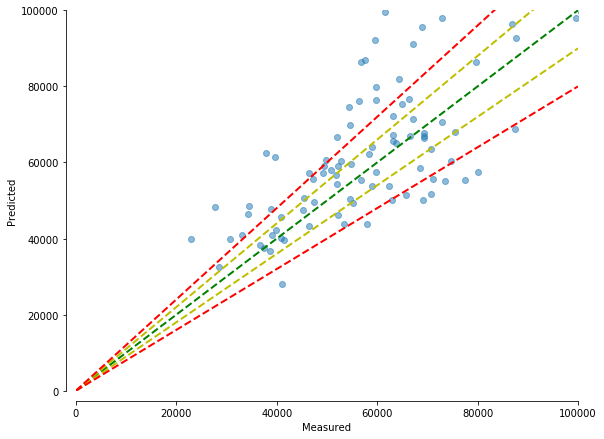

In [147]:
import matplotlib.pyplot as plt
import numpy as np
def plot_regression_results(ax, y_true, y_pred, interval=[10000, 1000000]):
    """Scatter plot of the predicted vs true targets."""
    ax.plot(interval,
            interval,
            '--g', linewidth=2)
    ax.plot(interval, [i*0.9 for i in interval], '--y', linewidth=2)
    ax.plot(interval, [i*1.1 for i in interval], '--y', linewidth=2)
    ax.plot(interval, [i*0.8 for i in interval], '--r', linewidth=2)
    ax.plot(interval, [i*1.2 for i in interval], '--r', linewidth=2)
    ax.scatter(y_true, y_pred, alpha=0.5)
    
    ax.set_xlim(interval)
    ax.set_ylim(interval)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
#     ax.set_xlim([y_true.min(), y_true.max()])
#     ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

    plt.show()

fig, axs = plt.subplots(1, 1, figsize=(9, 7))
axs = np.ravel(axs)

plot_regression_results(axs[0], real_prices, predictions, [0,100000])

In [34]:
test.to_csv("preditions_bucuresti_17mai.csv")

In [116]:
r = np.array([10, 21,3,55])
p = np.array([9, 22, 5, 49.5])




-12.857142857142854